<Axes: >

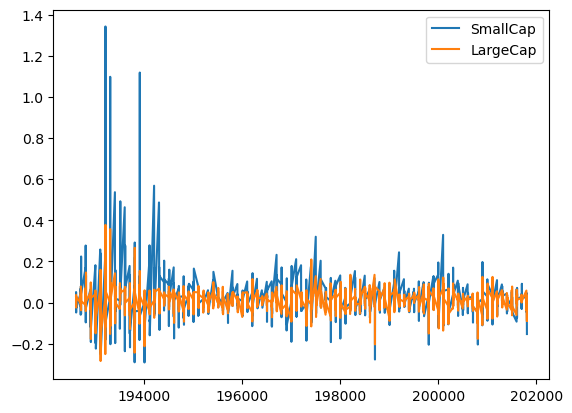

In [16]:
import pandas as pd
me_m = pd.read_csv("data/Portfolios_Formed_on_ME_monthly_EW.csv", 
                   header=0, index_col = 0, parse_dates = False, na_values = -99.99)
rets = me_m[['Lo 10', "Hi 10"]]
rets.columns = ['SmallCap','LargeCap']
rets = rets/100
rets.head
rets.plot.line()

In [20]:
rets.index = pd.to_datetime(rets.index, format="%Y%m")
rets.index = rets.index.to_period('M')
rets.head


<bound method NDFrame.head of          SmallCap  LargeCap
1926-07   -0.0145    0.0329
1926-08    0.0512    0.0370
1926-09    0.0093    0.0067
1926-10   -0.0484   -0.0243
1926-11   -0.0078    0.0270
...           ...       ...
2018-08    0.0241    0.0234
2018-09   -0.0168    0.0087
2018-10   -0.1002   -0.0657
2018-11   -0.0365    0.0253
2018-12   -0.1531   -0.0890

[1110 rows x 2 columns]>

<Axes: >

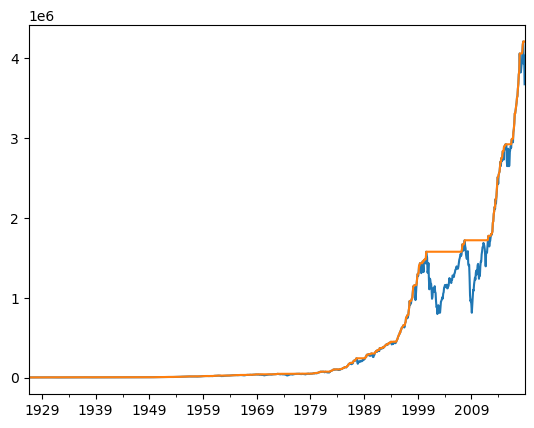

In [29]:
wealth_index = 1000*(1+rets["LargeCap"]).cumprod()
wealth_index.plot.line()
wealth_index.cummax().plot.line()

In [33]:
drawdown = (wealth_index - wealth_index.cummax())
drawdown.plot.line()

TypeError: unsupported operand type(s) for /: 'float' and 'method'

In [39]:
def drawdown(return_series):
    """
    Takes a time series of asset returns
    Computes and returns a datafram that contains:
    The weatlh index
    Previous peaks
    Percent drawdown
    """

    wealth_index = 1000*(1+return_series).cumprod()
    previous_peaks = wealth_index.cummax()
    drawdowns = (wealth_index - previous_peaks)/previous_peaks
    return pd.DataFrame({"Wealth": wealth_index,
                        "Peaks": previous_peaks,
                        "Drawdowns": drawdowns,})

<Axes: >

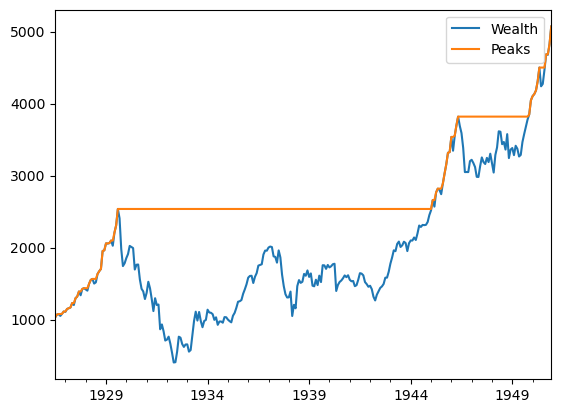

In [43]:
drawdown(rets[:"1950"]["LargeCap"])[["Wealth","Peaks"]].plot()

In [46]:
drawdown(rets["SmallCap"])["Drawdowns"].min()

-0.8330007793945303

In [47]:
drawdown(rets["SmallCap"])["Drawdowns"].idxmin()

Period('1932-05', 'M')